## train.npz

In [75]:
import numpy as np

# Cargar el archivo .npz (ruta relativa a este notebook)
data = np.load("../train.npz")

# Mostrar qué claves hay y sus shapes/dtypes
print('keys:', data.files)
for k in data.files:
    arr = data[k]
    try:
        print(f'{k}: shape={arr.shape}, dtype={arr.dtype}')
    except Exception as e:
        print(f'{k}: (no se pudo obtener shape/dtype) ->', e)

keys: ['x', 'y', 'x_offsets', 'y_offsets']
x: shape=(60463, 12, 10, 3), dtype=float32


y: shape=(60463, 12, 10, 3), dtype=float32
x_offsets: shape=(12, 1), dtype=int64
y_offsets: shape=(12, 1), dtype=int64


## val.npz

In [76]:
import numpy as np

# Cargar el archivo .npz (ruta relativa a este notebook)
data = np.load("../val.npz")

# Mostrar qué claves hay y sus shapes/dtypes
print('keys:', data.files)
for k in data.files:
    arr = data[k]
    try:
        print(f'{k}: shape={arr.shape}, dtype={arr.dtype}')
    except Exception as e:
        print(f'{k}: (no se pudo obtener shape/dtype) ->', e)

keys: ['x', 'y', 'x_offsets', 'y_offsets']
x: shape=(8638, 12, 10, 3), dtype=float32
y: shape=(8638, 12, 10, 3), dtype=float32
x_offsets: shape=(12, 1), dtype=int64
y_offsets: shape=(12, 1), dtype=int64


## Visualizar test.npz

Pequeño EDA: mostrar claves y shapes dentro de `test.npz`, algunas estadísticas simples y graficar la trayectoria de un nodo.
Cambia `sample_idx` y `node_idx` en las celdas de ejemplo para explorar otras muestras/nodos.

In [77]:
import numpy as np

# Cargar el archivo .npz (ruta relativa a este notebook)
data = np.load("../test.npz")

# Mostrar qué claves hay y sus shapes/dtypes
print('keys:', data.files)
for k in data.files:
    arr = data[k]
    try:
        print(f'{k}: shape={arr.shape}, dtype={arr.dtype}')
    except Exception as e:
        print(f'{k}: (no se pudo obtener shape/dtype) ->', e)

keys: ['x', 'y', 'x_offsets', 'y_offsets']
x: shape=(17275, 12, 10, 3), dtype=float32
y: shape=(17275, 12, 10, 3), dtype=float32
x_offsets: shape=(12, 1), dtype=int64
y_offsets: shape=(12, 1), dtype=int64


In [78]:
# Asignar variables esperadas (ajusta claves si tu archivo es distinto)
x = data.get('x')
y = data.get('y')
print('x:', None if x is None else x.shape, 'y:', None if y is None else y.shape)

# Estadísticos rápidos (si existen)
if x is not None:
    print('\nResumen rápido de `x`:')
    print(' dtype:', x.dtype)
    print(' min:', x.min(), ' max:', x.max(), ' mean:', float(x.mean()), ' std:', float(x.std()))
if y is not None:
    print('\nResumen rápido de `y`:')
    print(' dtype:', y.dtype)
    print(' min:', y.min(), ' max:', y.max(), ' mean:', float(y.mean()), ' std:', float(y.std()))

x: (17275, 12, 10, 3) y: (17275, 12, 10, 3)

Resumen rápido de `x`:
 dtype: float32
 min: -1465.9421  max: 142.2722  mean: -224.56448364257812  std: 432.7587585449219

Resumen rápido de `y`:
 dtype: float32
 min: -1466.2134  max: 142.27858  mean: -224.5990753173828  std: 432.8252868652344


In [79]:
# Ver posiciones (x, y) de todos los nodos en sample=0, t=0
import numpy as np

# Cargar el archivo
data = np.load("../test.npz")
x = data["x"]

# Seleccionar la primera muestra y el primer paso temporal
sample = 0
t = 0

# Extraer las coordenadas (x, y) de los 10 nodos
positions = x[sample, t, :, :2]  # [:2] -> solo las 2 primeras columnas (x,y)
print("Posiciones (x, y) en sample 0, tiempo 0:\n", positions)

Posiciones (x, y) en sample 0, tiempo 0:
 [[-1142.28   -93.1 ]
 [ -401.48   -53.59]
 [ -677.73    95.05]
 [-1075.96   113.02]
 [   28.42   -36.69]
 [-1171.78   113.84]
 [ -102.61   -39.96]
 [ -185.61   -62.52]
 [ -469.26    80.8 ]
 [ -910.38    -2.61]]


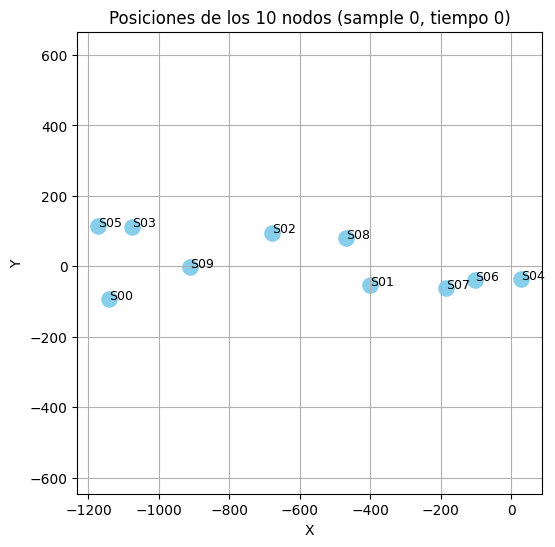

In [80]:
# graficarlos en un plano XY

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(positions[:, 0], positions[:, 1], c='skyblue', s=120)

for i, (xpos, ypos) in enumerate(positions):
    plt.text(xpos + 0.05, ypos + 0.05, f"S{i:02d}", fontsize=9)

plt.title("Posiciones de los 10 nodos (sample 0, tiempo 0)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis("equal")
plt.show()

In [81]:
# Cómo se mueven a lo largo del tiempo (los 12 pasos):

# for t in range(12):
#     plt.clf()
#     plt.scatter(x[sample, t, :, 0], x[sample, t, :, 1], c='orange')
#     plt.title(f"Paso temporal t={t}")
#     plt.pause(0.2)

In [82]:
import pandas as pd

# Construir un DataFrame para una muestra de ejemplo y ver los nodos
sample_idx = 0  # cambia para ver otra secuencia
if x is None:
    raise ValueError('No se encontró la matriz `x` en test.npz')
# Se asume shape: (n_samples, seq_len, n_nodes, features) y que las 2 primeras features son x,y
seq = x[sample_idx, :, :, :2]  # (seq_len, n_nodes, 2)
seq_len, num_nodes, _ = seq.shape

df_list = []
for i in range(num_nodes):
    df_tmp = pd.DataFrame(seq[:, i, :], columns=['x', 'y'])
    df_tmp['node'] = f'S{i:02d}'
    df_tmp['t'] = range(seq_len)
    df_list.append(df_tmp)
df = pd.concat(df_list, ignore_index=True)

print('muestra sample_idx=', sample_idx, ' seq_len=', seq_len, ' num_nodes=', num_nodes)
print('nodos disponibles:', sorted(df['node'].unique())[:10], '...')
df.head(20)

muestra sample_idx= 0  seq_len= 12  num_nodes= 10
nodos disponibles: ['S00', 'S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09'] ...


,x,y,node,t
0,-1142.283081,-93.097931,S00,0
1,-1142.283081,-93.091148,S00,1
2,-1142.282471,-93.093544,S00,2
3,-1142.296997,-93.081848,S00,3
4,-1142.332642,-93.072502,S00,4
5,-1142.333252,-93.082954,S00,5
6,-1142.355469,-93.078590,S00,6
7,-1142.364624,-93.090698,S00,7
8,-1142.367798,-93.095688,S00,8
9,-1142.394165,-93.116600,S00,9


In [83]:
# Función única: plot_node_trajectory acepta `x`, `sample_idx` y `node_idx` como argumentos
import matplotlib.pyplot as plt

def plot_node_trajectory(x, sample_idx=0, node_idx=0, node_label=None, figsize=(15,5)):
    """Grafica la trayectoria X-Y y X(t), Y(t) para un nodo dado en la matriz x.
    x: array con shape (n_samples, seq_len, n_nodes, features)
    sample_idx: índice de la secuencia a mostrar
    node_idx: índice del nodo a resaltar (se convertirá a etiqueta 'Sxx')
    node_label: si se provee, usa esta etiqueta en lugar de node_idx
    Devuelve (fig, axes)."""
    import pandas as pd
    # Validaciones
    if x is None:
        raise ValueError('x es None')
    n_samples = x.shape[0]
    if not (0 <= sample_idx < n_samples):
        raise IndexError(f'sample_idx fuera de rango: debe estar en [0, {n_samples-1}]')
    # Construir df local para la muestra seleccionada (tomamos las 2 primeras features como x,y)
    seq = x[sample_idx, :, :, :2]  # (seq_len, n_nodes, 2)
    seq_len, num_nodes, _ = seq.shape
    df_list = []
    for i in range(num_nodes):
        df_tmp = pd.DataFrame(seq[:, i, :], columns=['x','y'])
        df_tmp['node'] = f'S{i:02d}'
        df_tmp['t'] = range(seq_len)
        df_list.append(df_tmp)
    df_local = pd.concat(df_list, ignore_index=True)

    # Seleccionar nodo
    node_label = node_label or f'S{node_idx:02d}'
    g = df_local[df_local['node'] == node_label].copy()
    if g.empty:
        raise ValueError(f'Nodo {node_label} no encontrado en el sample {sample_idx}')

    # Dibujar subplots: X-Y, X(t), Y(t)
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    # 1) Trayectoria X-Y (fondo: todos los nodos en gris)
    for sid, group in df_local.groupby('node'):
        axes[0].plot(group['x'], group['y'], marker='o', alpha=0.15, linewidth=1, markersize=3, color='gray')
    axes[0].plot(g['x'], g['y'], marker='o', alpha=1.0, linewidth=2, markersize=5, color='C0', label=node_label)
    for _, row in g.iterrows():
        axes[0].text(row['x'], row['y'], str(int(row['t'])), fontsize=8, alpha=0.7)
    axes[0].set_xlabel('Posición X')
    axes[0].set_ylabel('Posición Y')
    axes[0].set_title(f'Trayectoria del nodo {node_label} (sample {sample_idx})')
    axes[0].grid(True)
    axes[0].set_aspect('equal', adjustable='box')

    # 2) X vs Tiempo
    axes[1].plot(g['t'], g['x'], marker='o', color='C1')
    axes[1].set_xlabel('Tiempo (t)')
    axes[1].set_ylabel('Posición X')
    axes[1].set_title('X vs Tiempo')
    axes[1].grid(True)

    # 3) Y vs Tiempo
    axes[2].plot(g['t'], g['y'], marker='o', color='C2')
    axes[2].set_xlabel('Tiempo (t)')
    axes[2].set_ylabel('Posición Y')
    axes[2].set_title('Y vs Tiempo')
    axes[2].grid(True)

    plt.tight_layout()
    return fig, axes


In [84]:
# Función enfocada: dibuja SOLO el nodo seleccionado (sin fondo con otros nodos), con zoom y opcional anotación
def plot_single_node(x, sample_idx=0, node_idx=0, node_label=None, figsize=(6,6), connect_points=True, annotate_ends=True):
    """Dibuja únicamente la trayectoria del nodo seleccionado en un sample concreto.
    - x: array (n_samples, seq_len, n_nodes, features)
    - sample_idx, node_idx: índices a visualizar
    - node_label: etiqueta alternativa 'Sxx' (opcional)
    - connect_points: conecta los puntos con línea
    - annotate_ends: etiqueta inicio/fin para no saturar el gráfico
    Devuelve (fig, ax)."""
    import pandas as pd
    if x is None:
        raise ValueError('x es None; ejecuta la celda que carga ../test.npz')
    n_samples = x.shape[0]
    if not (0 <= sample_idx < n_samples):
        raise IndexError(f'sample_idx fuera de rango: 0..{n_samples-1}')
    # Extraer solo las 2 primeras features (x,y) del nodo solicitado
    seq = x[sample_idx, :, :, :2]  # (seq_len, n_nodes, 2)
    seq_len, num_nodes, _ = seq.shape
    if not (0 <= node_idx < num_nodes):
        raise IndexError(f'node_idx fuera de rango: 0..{num_nodes-1}')
    # DataFrame para el nodo elegido
    df_node = pd.DataFrame(seq[:, node_idx, :], columns=['x','y'])
    df_node['t'] = range(seq_len)
    node_label = node_label or f'S{node_idx:02d}'

    # Plot focused figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    linestyle = '-' if connect_points else ''
    ax.plot(df_node['x'], df_node['y'], marker='o', linestyle=linestyle, color='C3', linewidth=2, markersize=6)

    # Anotar inicio y fin (por defecto) para evitar saturar
    if annotate_ends and len(df_node) > 0:
        ax.text(df_node.iloc[0]['x'], df_node.iloc[0]['y'], f"t={int(df_node.iloc[0]['t'])}", fontsize=9, weight='bold', color='C3', va='bottom')
        ax.text(df_node.iloc[-1]['x'], df_node.iloc[-1]['y'], f"t={int(df_node.iloc[-1]['t'])}", fontsize=9, weight='bold', color='C3', va='top')

    ax.set_xlabel('Posición X')
    ax.set_ylabel('Posición Y')
    ax.set_title(f'Trayectoria (solo nodo) {node_label} — sample {sample_idx}')
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')

    # Zoom alrededor de la trayectoria del nodo con un padding
    try:
        pad = 0.15
        x_min, x_max = float(df_node['x'].min()), float(df_node['x'].max())
        y_min, y_max = float(df_node['y'].min()), float(df_node['y'].max())
        x_span = max(x_max - x_min, 1e-3)
        y_span = max(y_max - y_min, 1e-3)
        ax.set_xlim(x_min - pad * x_span, x_max + pad * x_span)
        ax.set_ylim(y_min - pad * y_span, y_max + pad * y_span)
    except Exception:
        pass

    return fig, ax

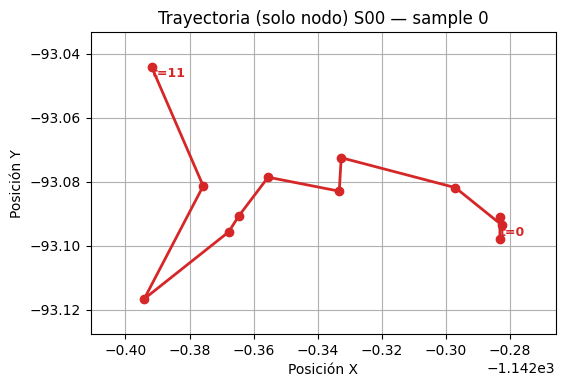

In [85]:
# Ejecutar ejemplo: sample 0, nodo 0
try:
    fig, axes = plot_single_node(x, sample_idx=0, node_idx=0)
    plt.show()
except Exception as e:
    print('Error al ejecutar plot_node_trajectory:', e)

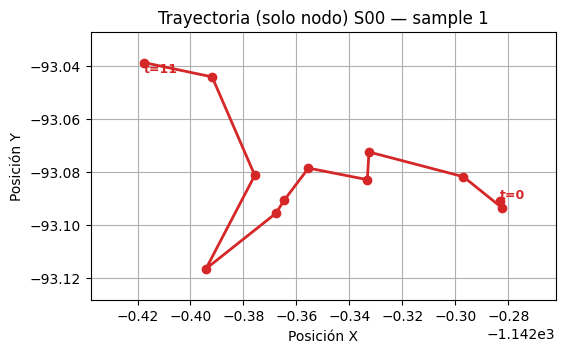

In [86]:
# Ejecutar ejemplo: sample 0, nodo 0
try:
    fig, axes = plot_single_node(x, sample_idx=1, node_idx=0)
    plt.show()
except Exception as e:
    print('Error al ejecutar plot_node_trajectory:', e)

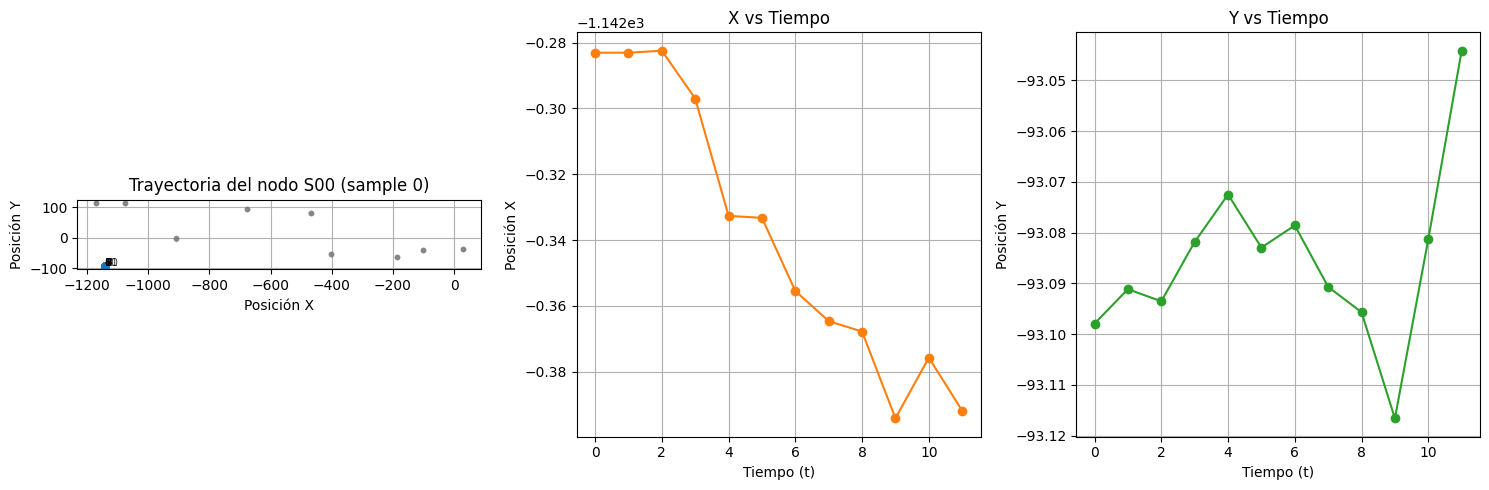

In [87]:
# Ejecutar ejemplo: sample 0, nodo 0
try:
    fig, axes = plot_node_trajectory(x, sample_idx=0, node_idx=0)
    plt.show()
except Exception as e:
    print('Error al ejecutar plot_node_trajectory:', e)

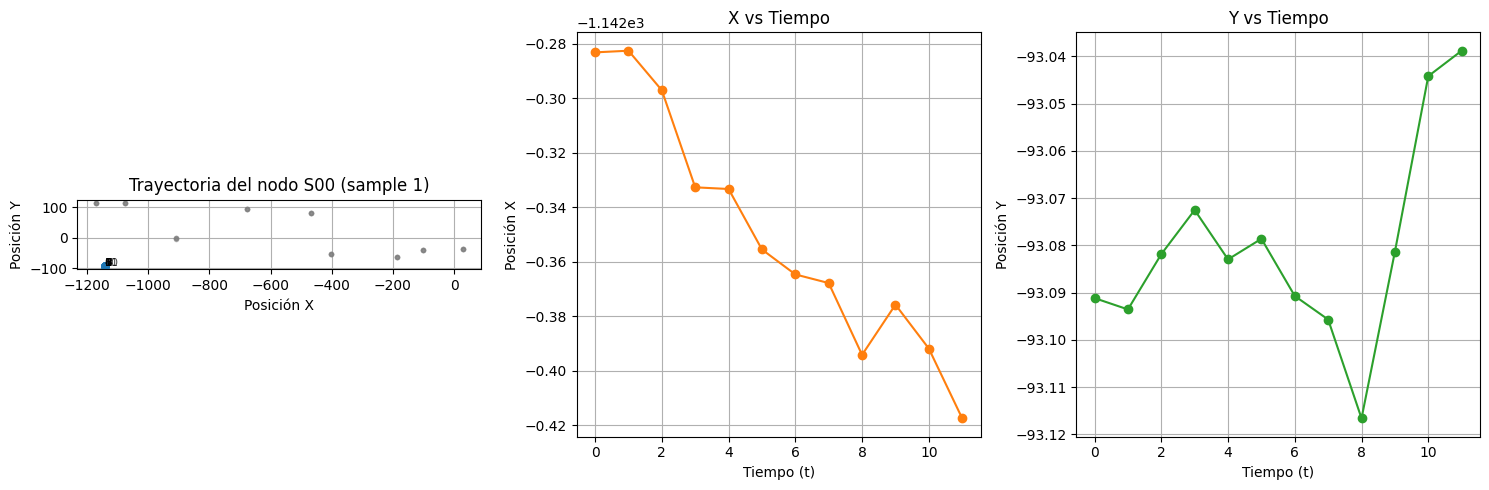

In [88]:
# sample 1, nodo 0
try:
    fig, axes = plot_node_trajectory(x, sample_idx=1, node_idx=0)
    plt.show()
except Exception as e:
    print('Error al ejecutar plot_node_trajectory:', e)

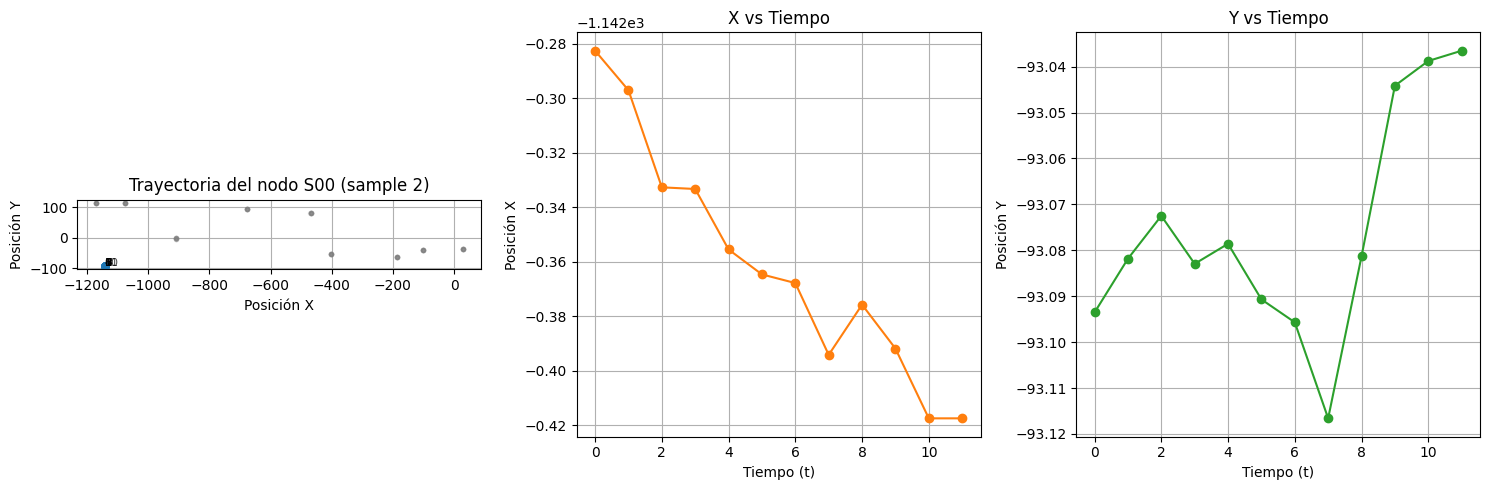

In [89]:
# sample 2, nodo 0
try:
    fig, axes = plot_node_trajectory(x, sample_idx=2, node_idx=0)
    plt.show()
except Exception as e:
    print('Error al ejecutar plot_node_trajectory:', e)

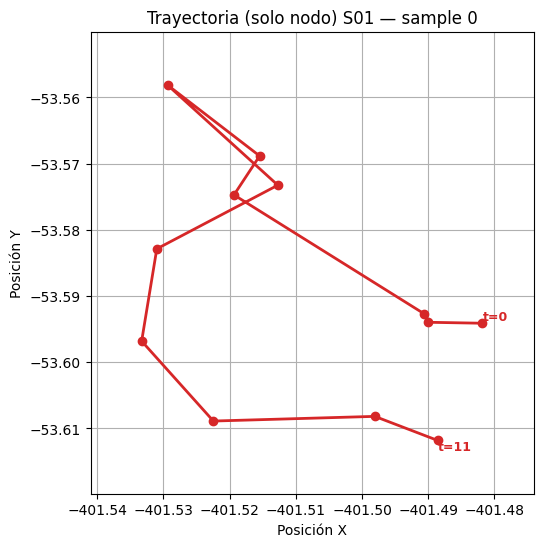

In [90]:
# Ejecutar ejemplo: sample 0, nodo 1
try:
    fig, axes = plot_single_node(x, sample_idx=0, node_idx=1)
    plt.show()
except Exception as e:
    print('Error al ejecutar plot_node_trajectory:', e)

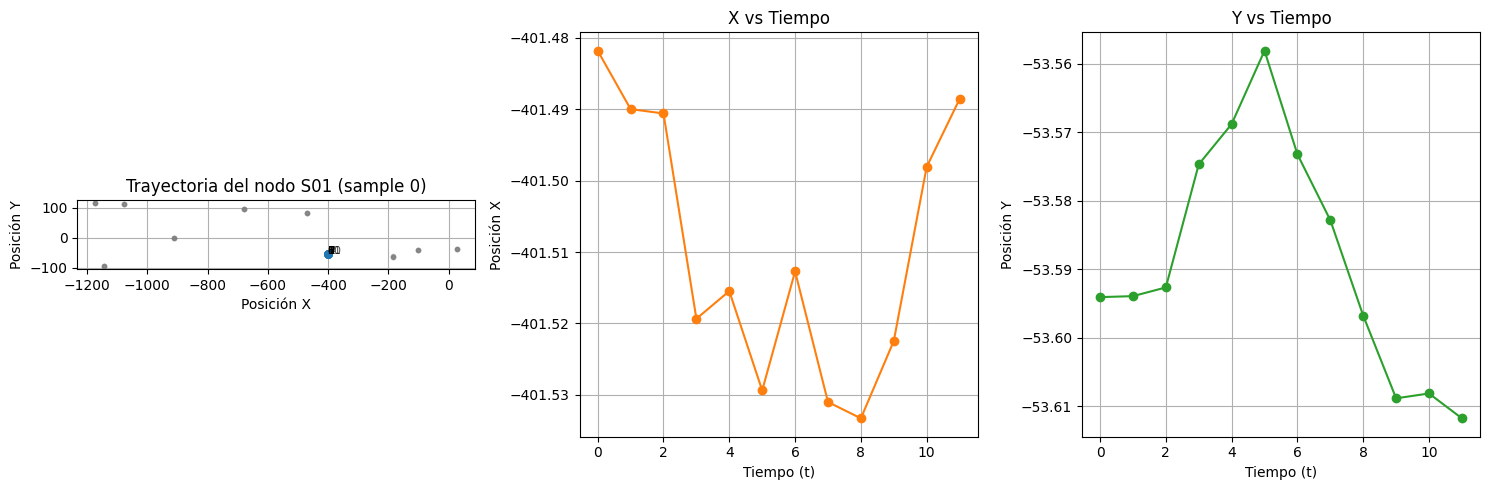

In [91]:
# sample 0, nodo 1
try:
    fig, axes = plot_node_trajectory(x, sample_idx=0, node_idx=1)
    plt.show()
except Exception as e:
    print('Error al ejecutar plot_node_trajectory:', e)

## Visualización de matriz de adyacencia

python3 /home/rlara/trabajo_rl/DCRNN_predecir_posicion/scripts/generate_students_training_data.py --output_dir /home/rlara/trabajo_rl/DCRNN_predecir_posicion/data/student_nodes --num_students 10 --step_seconds 1 --days 1 --seq_len 12 --horizon 12

python3 scripts/create_fully_connected_adj.py \
  --num_nodes 10 \
  --output_pkl ./data/student_nodes/adj_mx.pkl

CUDA_VISIBLE_DEVICES="" python3 dcrnn_train.py \
  --config_filename=./data/student_nodes/config/dcrnn_students.yaml

CUDA_VISIBLE_DEVICES="" /home/rlara/anaconda3/envs/dcrnn_tf1cpu/bin/python3 /home/rlara/trabajo_rl/DCRNN_predecir_posicion/run_demo.py --config_filename=/home/rlara/trabajo_rl/DCRNN_predecir_posicion/dcrnn_R_2_h_12_32-32_lr_0.001_bs_32_1111040404/config_5.yaml --output_filename=./data/student_nodes/dcrnn_predictions.npz --use_cpu_only True

## Predicciones: ground-truth vs modelo

Cargamos `data/student_nodes/dcrnn_predictions.npz` (generado por `run_demo.py`) y visualizamos predicción vs verdad para un sample y nodo seleccionados. Cambia `sample_idx` y `node_idx` en la celda de código para explorar.

keys: ['predictions', 'groundtruth']
H=12, N=17275, num_nodes=10, output_dim=2
pred_seq shape: (12, 2) truth_seq shape: (12, 2)


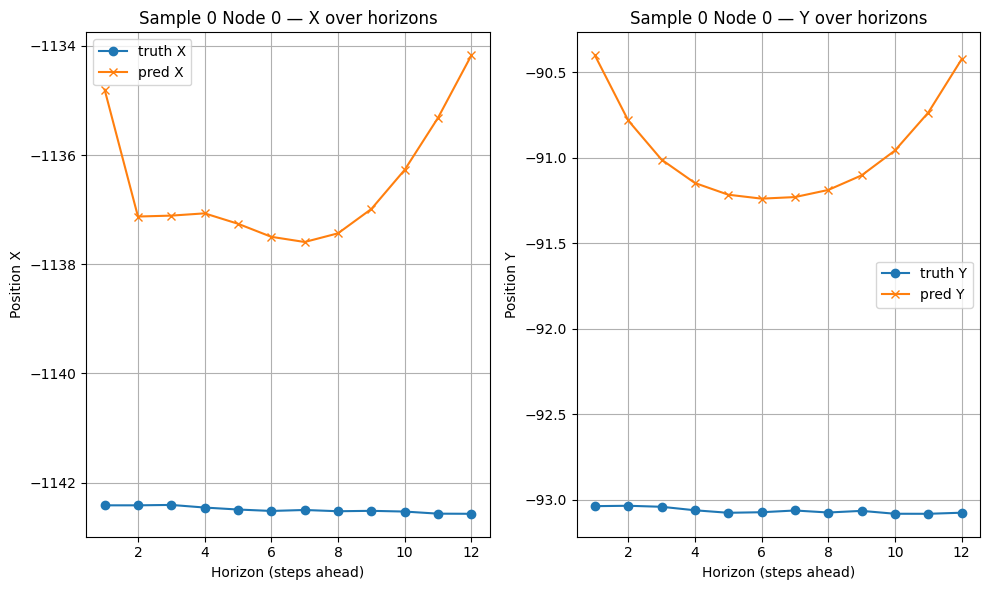

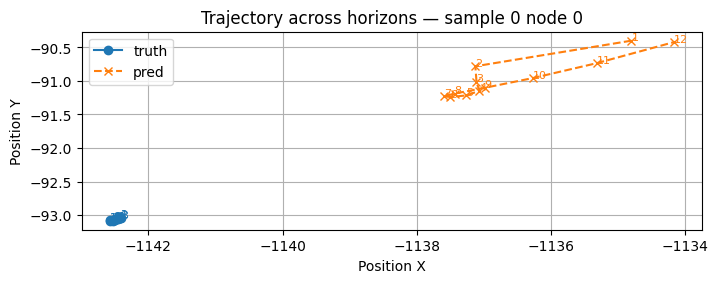

In [107]:
import numpy as np
import matplotlib.pyplot as plt

p = '../dcrnn_predictions_demo.npz'
data = np.load(p, allow_pickle=True)
print('keys:', data.files)

preds = data['predictions']   # shape: (H, N, num_nodes, output_dim)
truth = data['groundtruth']   # same shape
H, N, num_nodes, output_dim = preds.shape
print(f'H={H}, N={N}, num_nodes={num_nodes}, output_dim={output_dim}')

# Selecciona sample y nodo a visualizar
sample_idx = 0
node_idx = 0

pred_seq = np.stack([preds[h][sample_idx, node_idx, :] for h in range(H)], axis=0)
truth_seq = np.stack([truth[h][sample_idx, node_idx, :] for h in range(H)], axis=0)

print('pred_seq shape:', pred_seq.shape, 'truth_seq shape:', truth_seq.shape)

# 1) Plot X and Y vs horizon
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(range(1, H+1), truth_seq[:, 0], marker='o', label='truth X')
axes[0].plot(range(1, H+1), pred_seq[:, 0], marker='x', label='pred X')
axes[0].set_xlabel('Horizon (steps ahead)')
axes[0].set_ylabel('Position X')
axes[0].set_title(f'Sample {sample_idx} Node {node_idx} — X over horizons')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(range(1, H+1), truth_seq[:, 1], marker='o', label='truth Y')
axes[1].plot(range(1, H+1), pred_seq[:, 1], marker='x', label='pred Y')
axes[1].set_xlabel('Horizon (steps ahead)')
axes[1].set_ylabel('Position Y')
axes[1].set_title(f'Sample {sample_idx} Node {node_idx} — Y over horizons')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

# 2) Plot X-Y trajectory for the horizon sequence (connect points in horizon order)
fig, ax = plt.subplots(1, 1, figsize=(8, 12))
ax.plot(truth_seq[:, 0], truth_seq[:, 1], marker='o', linestyle='-', color='C0', label='truth')
ax.plot(pred_seq[:, 0], pred_seq[:, 1], marker='x', linestyle='--', color='C1', label='pred')
for i in range(H):
    ax.text(truth_seq[i, 0], truth_seq[i, 1], str(i+1), fontsize=8, color='C0')
    ax.text(pred_seq[i, 0], pred_seq[i, 1], str(i+1), fontsize=8, color='C1')
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.set_title(f'Trajectory across horizons — sample {sample_idx} node {node_idx}')
ax.legend()
ax.grid(True)
ax.set_aspect('equal', adjustable='box')
plt.show()

In [93]:
import numpy as np
import os

# Reorganizamos a (N, H, num_nodes, 2) para broadcast más claro
preds_pos = np.transpose(preds, (1, 0, 2, 3))   # (N, H, V, 2)
truth_pos = np.transpose(truth, (1, 0, 2, 3))   # (N, H, V, 2)

N, H, V, D = preds_pos.shape  # D debe ser 2


# Aquí es lo que se calcula la distancia

# Vectorizado: calcule distancia pairwise para todos los (N, H)
# pos[..., :, None, :] has shape (N, H, V, 1, 2)
# pos[..., None, :, :] has shape (N, H, 1, V, 2)
diff_pred = preds_pos[..., :, None, :] - preds_pos[..., None, :, :]    # (N, H, V, V, 2)
dists_pred = np.linalg.norm(diff_pred, axis=-1)                        # (N, H, V, V)

diff_truth = truth_pos[..., :, None, :] - truth_pos[..., None, :, :]
dists_truth = np.linalg.norm(diff_truth, axis=-1)                      # (N, H, V, V)

# Guardar matrices (ocupación: N*H*V*V floats; con V=10 es trivial)
out_dir = os.path.dirname(p)
np.savez_compressed(os.path.join(out_dir, 'dists_pred.npz'), dists_pred=dists_pred)
np.savez_compressed(os.path.join(out_dir, 'dists_truth.npz'), dists_truth=dists_truth)
print("Saved dists_pred.npz and dists_truth.npz in", out_dir)

# Métricas: MAE por horizonte (dos opciones: usar full off-diagonal o solo upper-triangle)
# 1) usar full off-diagonal (i!=j)
mask_offdiag = ~np.eye(V, dtype=bool)[None, None, :, :]   # shape (1,1,V,V) broadcastable

abs_err = np.abs(dists_pred - dists_truth) * mask_offdiag
# MAE por horizon (media sobre samples y pares)
mae_per_h_full = abs_err.sum(axis=(0,2,3)) / (N * mask_offdiag.sum())  # shape (H,)
print("MAE per horizon (full off-diag):", mae_per_h_full)

# 2) usar solo upper-triangle (cada par contado una vez)
mask_upper = np.triu(np.ones((V, V), dtype=bool), k=1)[None, None, :, :]
abs_err_upper = np.abs(dists_pred - dists_truth) * mask_upper
num_pairs_upper = mask_upper.sum()  # V*(V-1)/2
mae_per_h_upper = abs_err_upper.sum(axis=(0,2,3)) / (N * num_pairs_upper)
print("MAE per horizon (upper-triangle):", mae_per_h_upper)

# Métrica resumen
print("MAE mean over horizons (full):", float(mae_per_h_full.mean()))
print("MAE mean over horizons (upper):", float(mae_per_h_upper.mean()))

# Ejemplo: obtener la matriz NxN para sample s y horizon h
s = 0   # sample index
h = 0   # horizon index
Dpred = dists_pred[s, h]   # shape (V, V)
Dtruth = dists_truth[s, h]
print("Example Dpred shape:", Dpred.shape)

Saved dists_pred.npz and dists_truth.npz in ..
MAE per horizon (full off-diag): [ 9.78  8.76  8.78  9.17  9.73 10.4  11.19 12.05 13.04 14.17 15.46 16.91]
MAE per horizon (upper-triangle): [ 9.78  8.76  8.78  9.17  9.73 10.4  11.19 12.05 13.04 14.17 15.46 16.91]
MAE mean over horizons (full): 11.620500830787371
MAE mean over horizons (upper): 11.620500937985744
Example Dpred shape: (10, 10)


In [95]:
data = np.load("../dists_pred.npz")

# Mostrar qué claves hay y sus shapes/dtypes
print('keys:', data.files)
for k in data.files:
    arr = data[k]
    try:
        print(f'{k}: shape={arr.shape}, dtype={arr.dtype}')
    except Exception as e:
        print(f'{k}: (no se pudo obtener shape/dtype) ->', e)

keys: ['dists_pred']
dists_pred: shape=(17275, 12, 10, 10), dtype=float32


In [96]:
dists_pred = data["dists_pred"]

print("Shape:", dists_pred.shape)
print("Valores min/max:", dists_pred.min(), dists_pred.max())
print("Promedio global:", dists_pred.mean())

Shape: (17275, 12, 10, 10)
Valores min/max: 0.0 1476.6597
Promedio global: 555.9685


In [97]:
# Escoger una muestra (por ejemplo, la primera)
n = 0

# Escoger un paso temporal dentro del horizonte (por ejemplo, el último)
h = 0

mat = dists_pred[n, h]

# Redondear y usar formato de ancho fijo
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(mat)

[[   0.    733.    491.    210.9  1162.4   206.54 1033.66  947.29  687.23  239.01]
 [ 733.      0.    313.94  694.1   429.42  782.53  300.66  214.95  148.77  512.63]
 [ 491.    313.94    0.    397.35  718.22  487.81  592.77  515.99  211.32  252.  ]
 [ 210.9   694.1   397.35    0.   1113.15   90.5   986.18  905.7   608.64  199.87]
 [1162.4   429.42  718.22 1113.15    0.   1203.04  128.78  215.75  508.88  939.78]
 [ 206.54  782.53  487.81   90.5  1203.04    0.   1075.85  994.87  699.07  279.46]
 [1033.66  300.66  592.77  986.18  128.78 1075.85    0.     88.32  385.62  811.27]
 [ 947.29  214.95  515.99  905.7   215.75  994.87   88.32    0.    314.67  727.29]
 [ 687.23  148.77  211.32  608.64  508.88  699.07  385.62  314.67    0.    451.25]
 [ 239.01  512.63  252.    199.87  939.78  279.46  811.27  727.29  451.25    0.  ]]


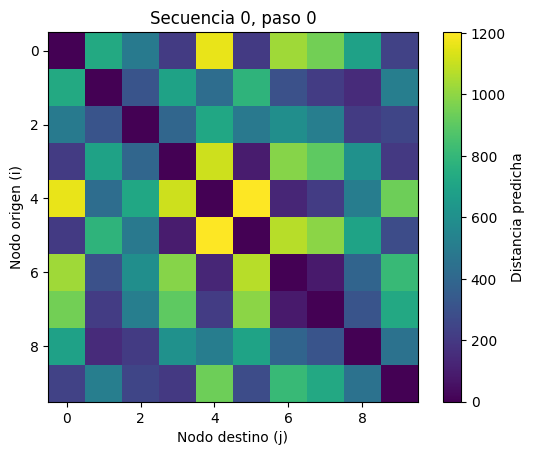

In [98]:
import matplotlib.pyplot as plt

n, h = 0, 0  # puedes variar estos índices

plt.imshow(dists_pred[n, h], cmap='viridis')
plt.colorbar(label='Distancia predicha')
plt.title(f'Secuencia {n}, paso {h}')
plt.xlabel('Nodo destino (j)')
plt.ylabel('Nodo origen (i)')
plt.show()

In [99]:
data = np.load("../dists_truth.npz")

# Mostrar qué claves hay y sus shapes/dtypes
print('keys:', data.files)
for k in data.files:
    arr = data[k]
    try:
        print(f'{k}: shape={arr.shape}, dtype={arr.dtype}')
    except Exception as e:
        print(f'{k}: (no se pudo obtener shape/dtype) ->', e)

keys: ['dists_truth']
dists_truth: shape=(17275, 12, 10, 10), dtype=float32


In [100]:
dists_truth = data["dists_truth"]

print("Shape:", dists_pred.shape)
print("Valores min/max:", dists_pred.min(), dists_pred.max())
print("Promedio global:", dists_pred.mean())

Shape: (17275, 12, 10, 10)
Valores min/max: 0.0 1476.6597
Promedio global: 555.9685


In [101]:
# Escoger una muestra (por ejemplo, la primera)
n = 0

# Escoger un paso temporal dentro del horizonte (por ejemplo, el último)
h = 0

mat = dists_truth[n, h]

# Redondear y usar formato de ancho fijo
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(mat)

[[   0.    741.96  501.17  216.47 1172.19  209.01 1041.13  957.24  695.12  248.84]
 [ 741.96    0.    313.72  695.01  430.25  788.49  299.18  216.03  150.53  511.63]
 [ 501.17  313.72    0.    398.81  718.41  494.53  590.82  516.75  208.94  252.37]
 [ 216.47  695.01  398.81    0.   1114.75   95.78  985.56  907.71  607.72  202.03]
 [1172.19  430.25  718.41 1114.75    0.   1209.82  131.09  215.63  511.46  939.62]
 [ 209.01  788.49  494.53   95.78 1209.82    0.   1080.38 1001.99  703.41  286.19]
 [1041.13  299.18  590.82  985.56  131.09 1080.38    0.     86.03  386.11  808.82]
 [ 957.24  216.03  516.75  907.71  215.63 1001.99   86.03    0.    317.85  727.4 ]
 [ 695.12  150.53  208.94  607.72  511.46  703.41  386.11  317.85    0.    449.02]
 [ 248.84  511.63  252.37  202.03  939.62  286.19  808.82  727.4   449.02    0.  ]]


Métricas por horizonte (off-diagonal: pares i!=j, cada par contado dos veces)
H=01: MAE=9.7774, RMSE=14.8369, MAPE=1.897 %
H=02: MAE=8.7595, RMSE=13.7403, MAPE=1.693 %
H=03: MAE=8.7841, RMSE=13.8633, MAPE=1.676 %
H=04: MAE=9.1749, RMSE=14.3016, MAPE=1.739 %
H=05: MAE=9.7332, RMSE=14.8871, MAPE=1.844 %
H=06: MAE=10.4048, RMSE=15.6009, MAPE=1.977 %
H=07: MAE=11.1863, RMSE=16.4570, MAPE=2.129 %
H=08: MAE=12.0539, RMSE=17.4777, MAPE=2.292 %
H=09: MAE=13.0377, RMSE=18.6841, MAPE=2.471 %
H=10: MAE=14.1653, RMSE=20.0879, MAPE=2.670 %
H=11: MAE=15.4560, RMSE=21.6881, MAPE=2.895 %
H=12: MAE=16.9130, RMSE=23.4720, MAPE=3.152 %
Mean over horizons (off-diag): MAE=11.6205, RMSE=17.0914, MAPE=2.203 %

Métricas por horizonte (upper-triangle: cada par contado una vez)
H=01: MAE=9.7774, RMSE=14.8369, MAPE=0.949 %
H=02: MAE=8.7595, RMSE=13.7403, MAPE=0.847 %
H=03: MAE=8.7841, RMSE=13.8633, MAPE=0.838 %
H=04: MAE=9.1749, RMSE=14.3016, MAPE=0.870 %
H=05: MAE=9.7332, RMSE=14.8871, MAPE=0.922 %
H=06: MAE=10

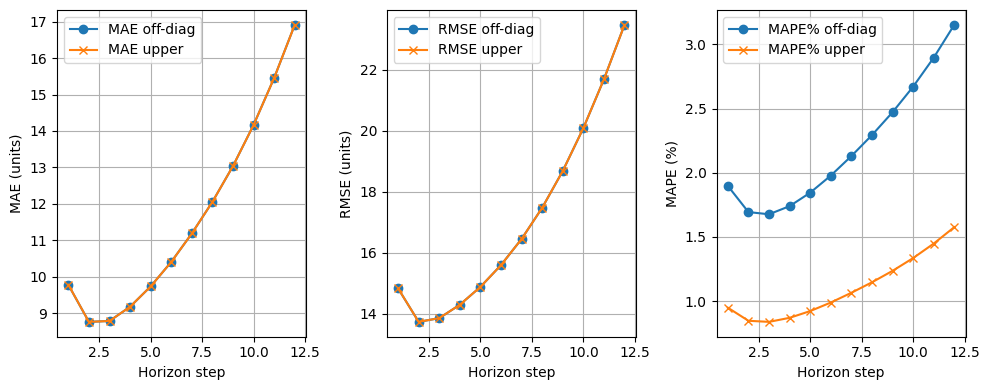

In [102]:
# Métricas por horizonte: MAE, MAPE (fraccional y %), RMSE
# Esta celda intenta usar las variables ya cargadas; si no existen, carga los .npz
import numpy as np
import os
import warnings
from math import sqrt
OUT_DIR = os.path.dirname('../dcrnn_predictions_demo.npz')  # ajustable
def _load_if_missing(varname, path):
    try:
        return globals()[varname]
    except Exception:
        data = np.load(path)
        # devolver la primera matriz encontrada si se usa un .npz con clave diferente
        if 'dists_pred' in data.files and varname == 'dists_pred':
            return data['dists_pred']
        if 'dists_truth' in data.files and varname == 'dists_truth':
            return data['dists_truth']
        # fallback: intentar claves comunes
        for k in data.files:
            if varname in k:
                return data[k]
        raise KeyError(f'No se encontró {varname} en {path}')
# Cargar si no existen en el namespace
if 'dists_pred' not in globals():
    try:
        dists_pred = _load_if_missing('dists_pred', '../dists_pred.npz')
    except Exception as e:
        raise RuntimeError('No se pudo cargar ../dists_pred.npz ni variable `dists_pred` ya definida: ' + str(e))
if 'dists_truth' not in globals():
    try:
        dists_truth = _load_if_missing('dists_truth', '../dists_truth.npz')
    except Exception as e:
        raise RuntimeError('No se pudo cargar ../dists_truth.npz ni variable `dists_truth` ya definida: ' + str(e))
# Comprobaciones de shape
if dists_pred.shape != dists_truth.shape:
    raise ValueError(f'Shape mismatch: dists_pred {dists_pred.shape} vs dists_truth {dists_truth.shape}')
# Dimensiones: (N, H, V, V)
N, H, V, _ = dists_pred.shape
# Máscaras: off-diagonal (i!=j) y upper-triangle (i<j)
mask_offdiag = ~np.eye(V, dtype=bool)[None, None, :, :]
mask_upper = np.triu(np.ones((V, V), dtype=bool), k=1)[None, None, :, :]
# Errores básicos
abs_err = np.abs(dists_pred - dists_truth)  # (N, H, V, V)
sq_err = (dists_pred - dists_truth) ** 2
# --- MAE ---
num_pairs_off = int(mask_offdiag.sum())  # por sample
mae_per_h_off = abs_err.sum(axis=(0, 2, 3)) / (N * num_pairs_off)  # shape (H,)
num_pairs_upper = int(mask_upper.sum())
mae_per_h_upper = (abs_err * mask_upper).sum(axis=(0, 2, 3)) / (N * num_pairs_upper)
# --- RMSE ---
mse_per_h_off = sq_err.sum(axis=(0, 2, 3)) / (N * num_pairs_off)
rmse_per_h_off = np.sqrt(mse_per_h_off)
mse_per_h_upper = (sq_err * mask_upper).sum(axis=(0, 2, 3)) / (N * num_pairs_upper)
rmse_per_h_upper = np.sqrt(mse_per_h_upper)
# --- MAPE (fraccional, 0..1) ---
eps = 1e-6
with np.errstate(divide='ignore', invalid='ignore'):
    denom = dists_truth.astype(float).copy()
    zero_count = int((denom <= eps).sum())
    denom[denom <= eps] = np.nan
    mape_frac = np.abs(dists_pred - dists_truth) / denom  # NaN where denom was small
    # aplicar máscaras y promediar por horizonte
    mape_per_h_off_frac = np.nanmean(mape_frac * mask_offdiag, axis=(0, 2, 3))
    mape_per_h_upper_frac = np.nanmean(mape_frac * mask_upper, axis=(0, 2, 3))
    # convertir a porcentajes para presentación
    mape_per_h_off_pct = mape_per_h_off_frac * 100.0
    mape_per_h_upper_pct = mape_per_h_upper_frac * 100.0
# Resúmenes globales (media sobre horizontes)
mean_mae_off = float(mae_per_h_off.mean())
mean_mae_upper = float(mae_per_h_upper.mean())
mean_rmse_off = float(rmse_per_h_off.mean())
mean_rmse_upper = float(rmse_per_h_upper.mean())
mean_mape_off_pct = float(np.nanmean(mape_per_h_off_pct))
mean_mape_upper_pct = float(np.nanmean(mape_per_h_upper_pct))
# Impresion por horizonte
print('Métricas por horizonte (off-diagonal: pares i!=j, cada par contado dos veces)')
for h in range(H):
    print(f'H={h+1:02d}: MAE={mae_per_h_off[h]:.4f}, RMSE={rmse_per_h_off[h]:.4f}, MAPE={mape_per_h_off_pct[h]:.3f} %')
print(f'Mean over horizons (off-diag): MAE={mean_mae_off:.4f}, RMSE={mean_rmse_off:.4f}, MAPE={mean_mape_off_pct:.3f} %')
print('\nMétricas por horizonte (upper-triangle: cada par contado una vez)')
for h in range(H):
    print(f'H={h+1:02d}: MAE={mae_per_h_upper[h]:.4f}, RMSE={rmse_per_h_upper[h]:.4f}, MAPE={mape_per_h_upper_pct[h]:.3f} %')
print(f'Mean over horizons (upper): MAE={mean_mae_upper:.4f}, RMSE={mean_rmse_upper:.4f}, MAPE={mean_mape_upper_pct:.3f} %')
# Guardar resultados compactados (metrics_per_h.npz)
out_dir = os.path.dirname('../dcrnn_predictions.npz') or '.'
out_path = os.path.join(out_dir, 'metrics_per_h.npz')
np.savez_compressed(out_path,
                    mae_per_h_off=mae_per_h_off,
                    mae_per_h_upper=mae_per_h_upper,
                    rmse_per_h_off=rmse_per_h_off,
                    rmse_per_h_upper=rmse_per_h_upper,
                    mape_per_h_off_frac=mape_per_h_off_frac,
                    mape_per_h_upper_frac=mape_per_h_upper_frac,
                    mape_per_h_off_pct=mape_per_h_off_pct,
                    mape_per_h_upper_pct=mape_per_h_upper_pct,
                    mean_mae_off=mean_mae_off,
                    mean_mae_upper=mean_mae_upper,
                    mean_rmse_off=mean_rmse_off,
                    mean_rmse_upper=mean_rmse_upper,
                    mean_mape_off_pct=mean_mape_off_pct,
                    mean_mape_upper_pct=mean_mape_upper_pct,
                    zero_denominator_count=zero_count)
print('\nSaved metrics summary to', out_path)
# Visualización rápida: MAE, RMSE, MAPE(%) sobre horizones
try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    # MAE subplot
    plt.subplot(1,3,1)
    plt.plot(range(1, H+1), mae_per_h_off, marker='o', label='MAE off-diag')
    plt.plot(range(1, H+1), mae_per_h_upper, marker='x', label='MAE upper')
    plt.xlabel('Horizon step')
    plt.ylabel('MAE (units)')
    plt.legend()
    plt.grid(True)
    # RMSE subplot
    plt.subplot(1,3,2)
    plt.plot(range(1, H+1), rmse_per_h_off, marker='o', label='RMSE off-diag')
    plt.plot(range(1, H+1), rmse_per_h_upper, marker='x', label='RMSE upper')
    plt.xlabel('Horizon step')
    plt.ylabel('RMSE (units)')
    plt.legend()
    plt.grid(True)
    # MAPE subplot
    plt.subplot(1,3,3)
    plt.plot(range(1, H+1), mape_per_h_off_pct, marker='o', label='MAPE% off-diag')
    plt.plot(range(1, H+1), mape_per_h_upper_pct, marker='x', label='MAPE% upper')
    plt.xlabel('Horizon step')
    plt.ylabel('MAPE (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
except Exception as e:
    warnings.warn('No se pudo dibujar los gráficos: ' + str(e))